# Temporary notebook for Outputs

In [1]:
import math

import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

import umap
from sklearn.manifold import TSNE

d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datapath = "../../data"

In [5]:
filename = datapath + "/raw/train-images.idx3-ubyte"
data = idx2numpy.convert_from_file(filename)

In [8]:
data.shape

(60000, 28, 28)

In [9]:
data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
data_reshaped = data.reshape(data.shape[0], -1)

In [12]:
data_reshaped[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

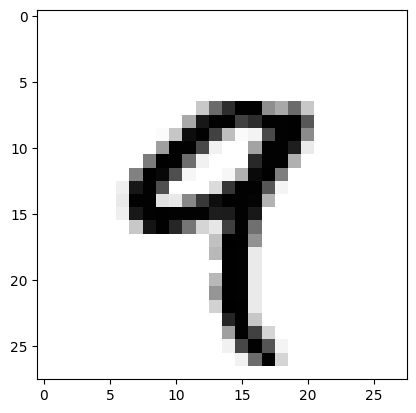

In [11]:
plt.imshow(data[4], cmap=plt.cm.binary)

## Visualisation Helperfunction

In [17]:
# Input:
#   - results: Computation results as an array of tuples with the form [("<<plot title>>", [<<2-dimensional array>>])],
#              where the 2-dimensional array describes the x- & y-position of each data point & the title should describe the chosen parameter-values
#   - figsize_columns: number of columns which are used to layout the plotted graphs. The number of rows is depending on the number of 'results' and the given 'figsize_columns'.
#   - figsize (optional): Adjusts the width/height of the individual graphs, in case the scaling is different for different computations
# Ouput: The plotted graphs which represent the given data from 'results'


def display_reduction_results(results, figsize_columns, figsize=(15, 15)):
    figsize_rows = math.ceil(len(results) / figsize_columns)
    fig = plt.subplots(figsize_rows, figsize_columns, figsize=figsize)
    # fig.tight_layout(pad=3)

    for i in range(len(results)):
        plt.subplot(figsize_rows, figsize_columns, i + 1).set_title(results[i][0])

        if len(results[i][1][0]) <= 2:
            plt.subplot(figsize_rows, figsize_columns, i + 1).scatter(
                results[i][1][:, 0], results[i][1][:, 1], alpha=0.4
            )
        else:
            plt.subplot(figsize_rows, figsize_columns, i + 1).scatter(
                results[i][1][:, 0],
                results[i][1][:, 1],
                c=results[i][1][:, 2],
                alpha=0.4,
            )

## t-SNE

In [13]:
perplexities = [10]
tsne_results = []

for perplexity in perplexities:
    tsne = TSNE(perplexity=perplexity, random_state=0).fit_transform(data_reshaped)
    parameter_string = "Perplexity: " + str(perplexity)
    tsne_results.append((parameter_string, tsne))

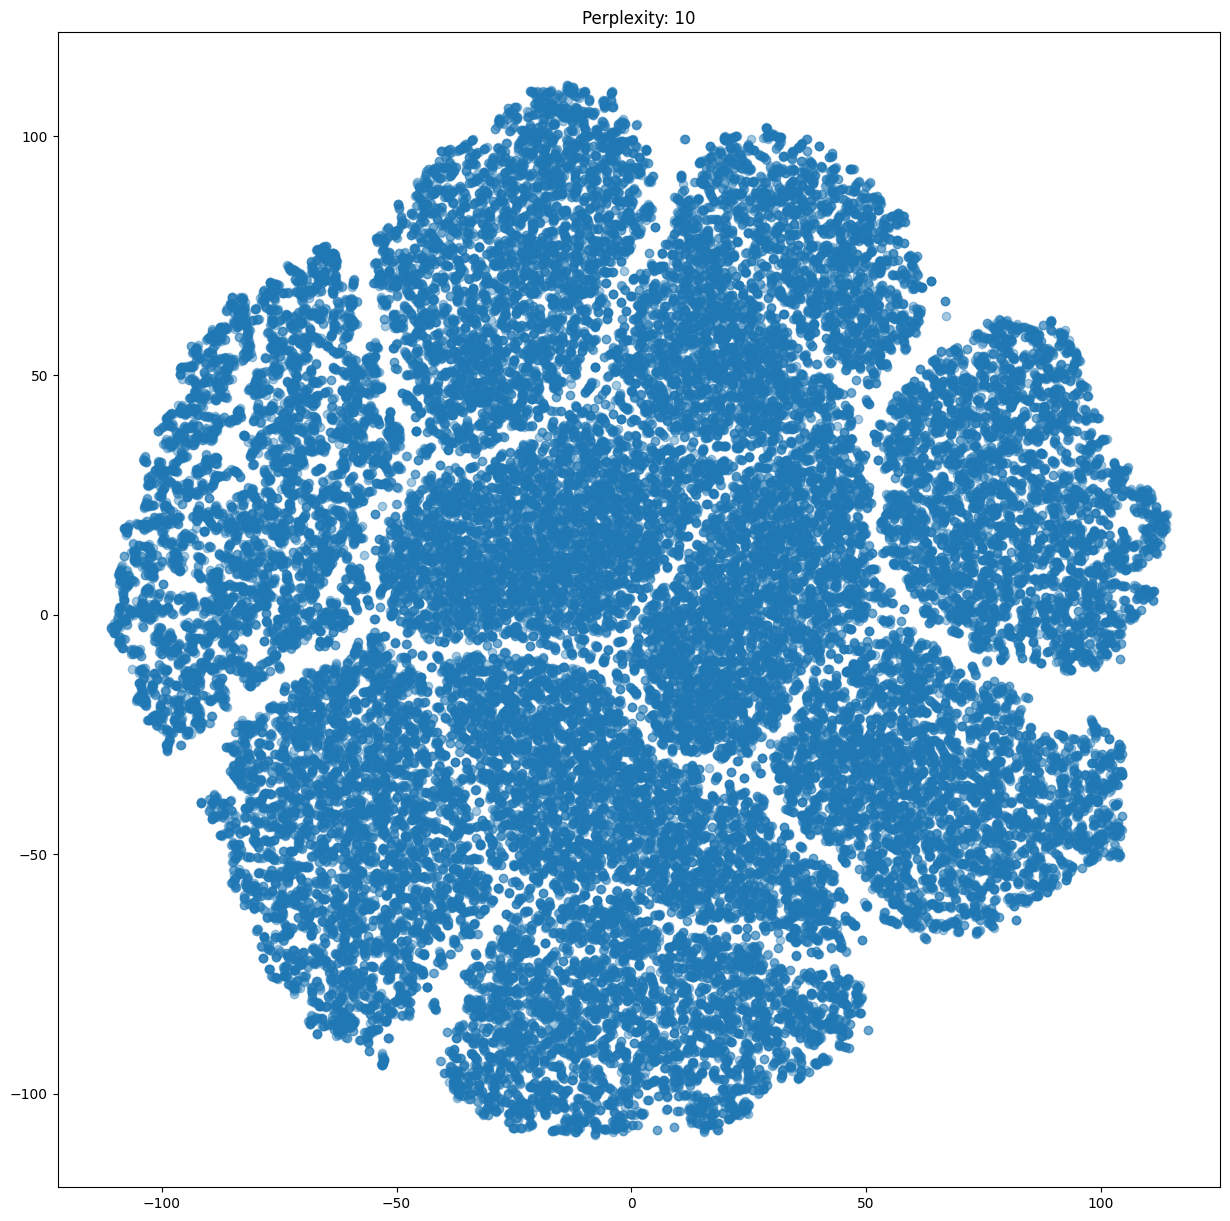

In [16]:
display_reduction_results(tsne_results, 1)

In [19]:
tsne_results[0][1].shape

(60000, 2)

In [24]:
targetdir = datapath + '/interim/'
np.save(targetdir + 'tsne_results.npy', tsne_results[0][1])

## UMAP

In [15]:
n_neighbors = [15]
umap_results = []

for n_neighbor in n_neighbors:
    umap_reducer = umap.UMAP(n_neighbors=n_neighbor, random_state=0).fit_transform(data_reshaped)
    parameter_string = "n_neighbors: " + str(n_neighbor)
    umap_results.append((parameter_string, umap_reducer))

d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Software-Projekte\Uni\master_thesis\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


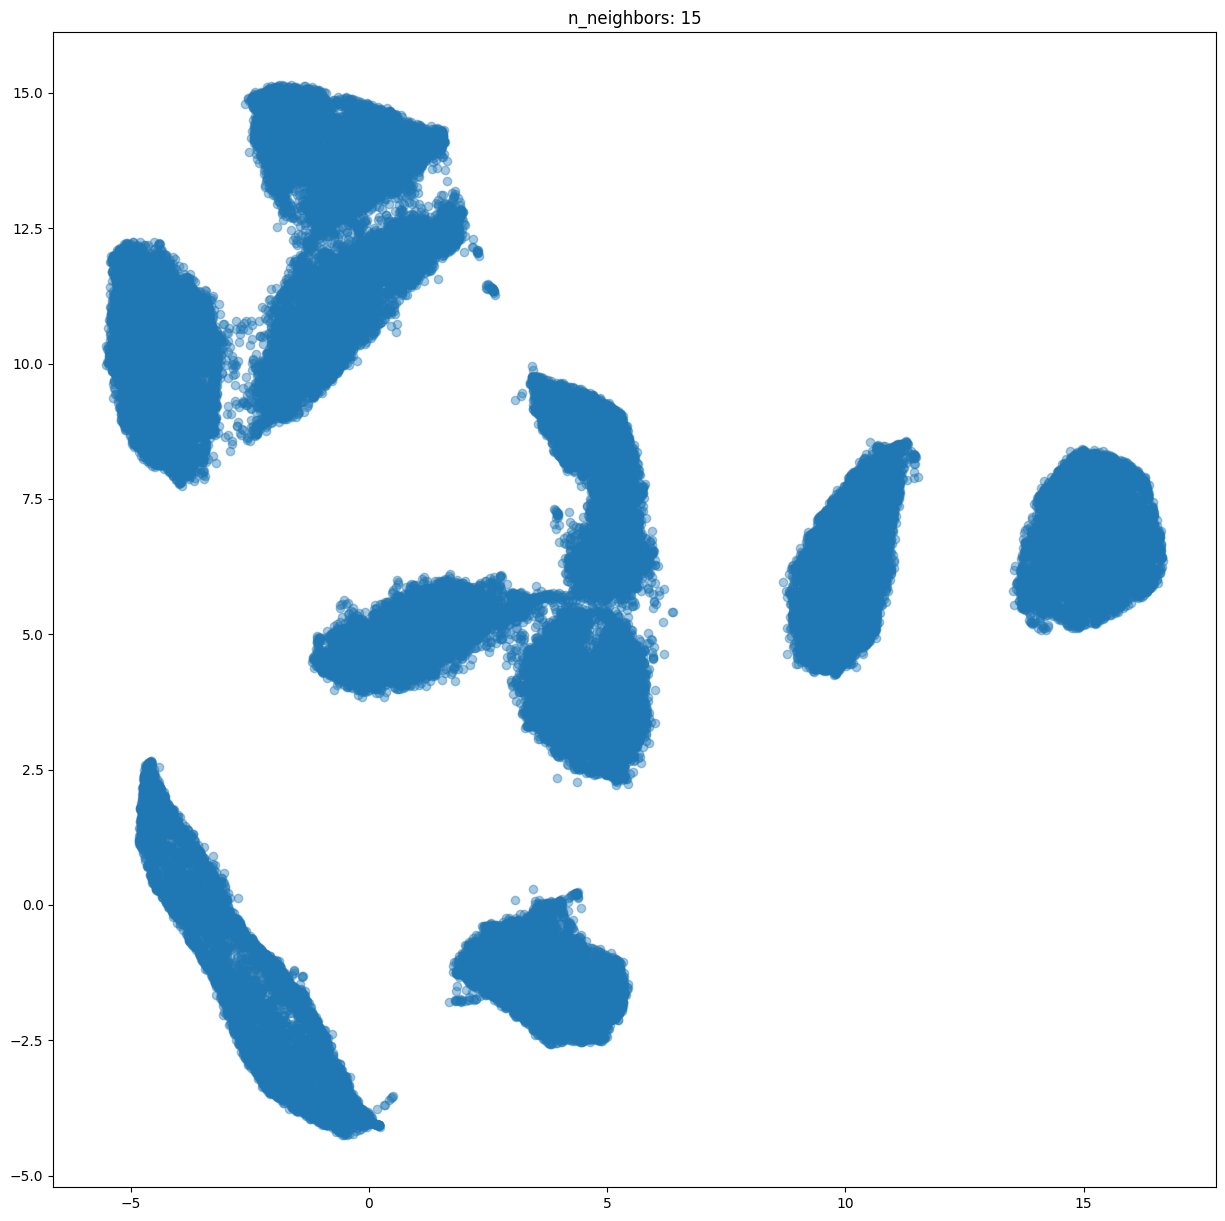

In [18]:
display_reduction_results(umap_results, 1)

In [19]:
targetdir = datapath + '/interim/'
np.save(targetdir + 'umap_results.npy', umap_results[0][1])